In [3]:
from matplotlib import pyplot as plt
import os
import json
import numpy as np

In [117]:
# Path of the statistics of the final model
o_s_path = os.path.join("..", "..","output","loss_accuracy_32_5e-05_15_fold_0.json")

In [118]:
with open(o_s_path, 'r') as stats_file:
    stats = json.load(stats_file)

In [119]:
def plot_loss_accuracy(
            steps: int,
            ax: any,
            stats: dict
    ):
        """
        The method plots the trend of the loss and f1 score

        Parameters
        ----------
        steps: int
            The number of steps
        ax: any
            The axes of the matplotlib figure
        stats: dict
            The dictionary of the statistics
        """

        titles = ['Loss', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
        attributes = ['loss', 'accuracy', 'f1_score', 'precision', 'recall']

        for i in range(len(titles)):
            title = titles[i]
            ax[i].set_title(title, fontsize=10)
            ax[i].set_xlabel("steps", fontsize=10)
            ax[i].set_ylabel(attributes[i], fontsize=10)

            if isinstance(stats[f"t_{attributes[i]}"][0], float):
                ax[i].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(stats[f"t_{attributes[i]}"])[:], '-', label=f"t-{attributes[i]}")
                ax[i].plot(range(0, len(stats[f"v_{attributes[i]}"]) * steps, steps), np.array(stats[f"v_{attributes[i]}"])[:], '-', label=f"v-{attributes[i]}")
            else:
                plots = {k: []  for k,_ in stats[f"t_{attributes[i]}"][0]}
                for tuple in stats[f"t_{attributes[i]}"]:
                    for k, v in tuple:
                        plots[k].append(v)
                for k, v in plots.items():
                    ax[i].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(v)[:], '-', label=f"t_{k}")

                plots = {k: []  for k,_ in stats[f"v_{attributes[i]}"][0]}
                for tuple in stats[f"v_{attributes[i]}"]:
                    for k, v in tuple:
                        plots[k].append(v)
                for k, v in plots.items():
                    ax[i].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(v)[:], '-', label=f"v_{k}")

            ax[i].legend()

In [120]:
def plot_f1_score(
            steps: int,
            ax: any,
            stats: dict
    ):
        """
        The method plots the trend of the loss and f1 score

        Parameters
        ----------
        steps: int
            The number of steps
        ax: any
            The axes of the matplotlib figure
        stats: dict
            The dictionary of the statistics
        """

        titles = ['F1 Score', 'Precision', 'Recall']
        attributes = ['f1_score', 'precision', 'recall']

        for i in range(len(titles)):
            plots = {k: {}  for k,_ in stats[f"t_{attributes[i]}"][0]}

            for k, v in plots.items():
                v["t"] = []
                v["v"] = []

            for tuple in stats[f"t_{attributes[i]}"]:
                for j, k_v in enumerate(tuple):
                    plots[k_v[0]]["t"].append(k_v[1])

            for tuple in stats[f"v_{attributes[i]}"]:
                for j, k_v in enumerate(tuple):
                    plots[k_v[0]]["v"].append(k_v[1])

            for j, k_v in enumerate(plots.items()):
                t_v_dict = k_v[1]
                title = titles[i]
                ax[i][j].set_title(f"{k_v[0]} - {title}", fontsize=10)
                ax[i][j].set_xlabel("steps", fontsize=10)
                ax[i][j].set_ylabel(attributes[i], fontsize=10)
                ax[i][j].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(t_v_dict['t'])[:], '-', label=f"t_{k}")
                ax[i][j].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(t_v_dict['v'])[:], '-', label=f"v_{k}")

                """plots = {k: []  for k,_ in stats[f"v_{attributes[i]}"][0]}
                for tuple in stats[f"v_{attributes[i]}"]:
                    for k, v in tuple:
                        plots[k].append(v)
                for k, v in plots.items():
                    ax[i][j].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(v)[:], '-', label=f"v_{k}")"""

                ax[i][j].legend()

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 640x480 with 0 Axes>

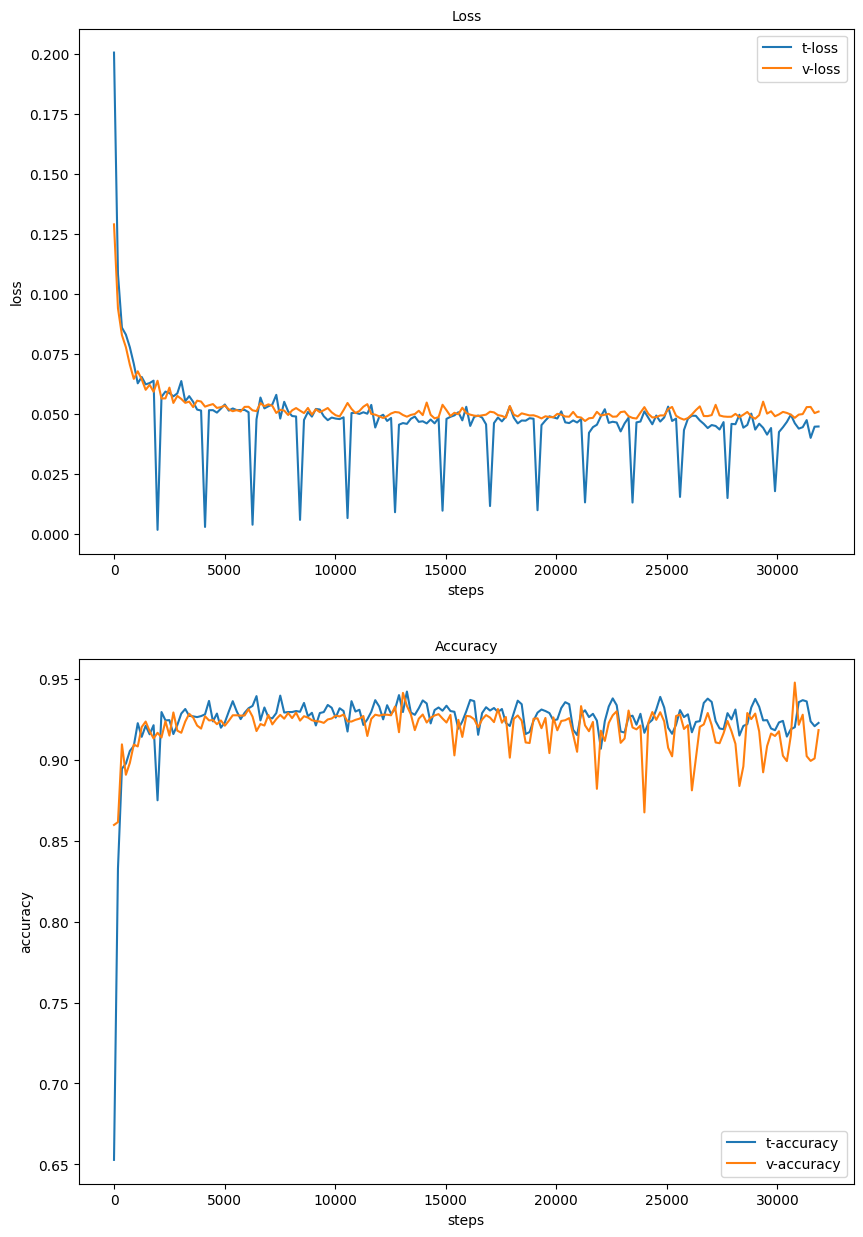

In [121]:
# Plot training loss and perplexity
plt.clf()

fig, ax = plt.subplots(2,1, figsize=(10,15))
plot_loss_accuracy(len(stats['t_loss']),ax,stats)

plt.subplots_adjust(hspace=0.3)
plt.show()

<Figure size 640x480 with 0 Axes>

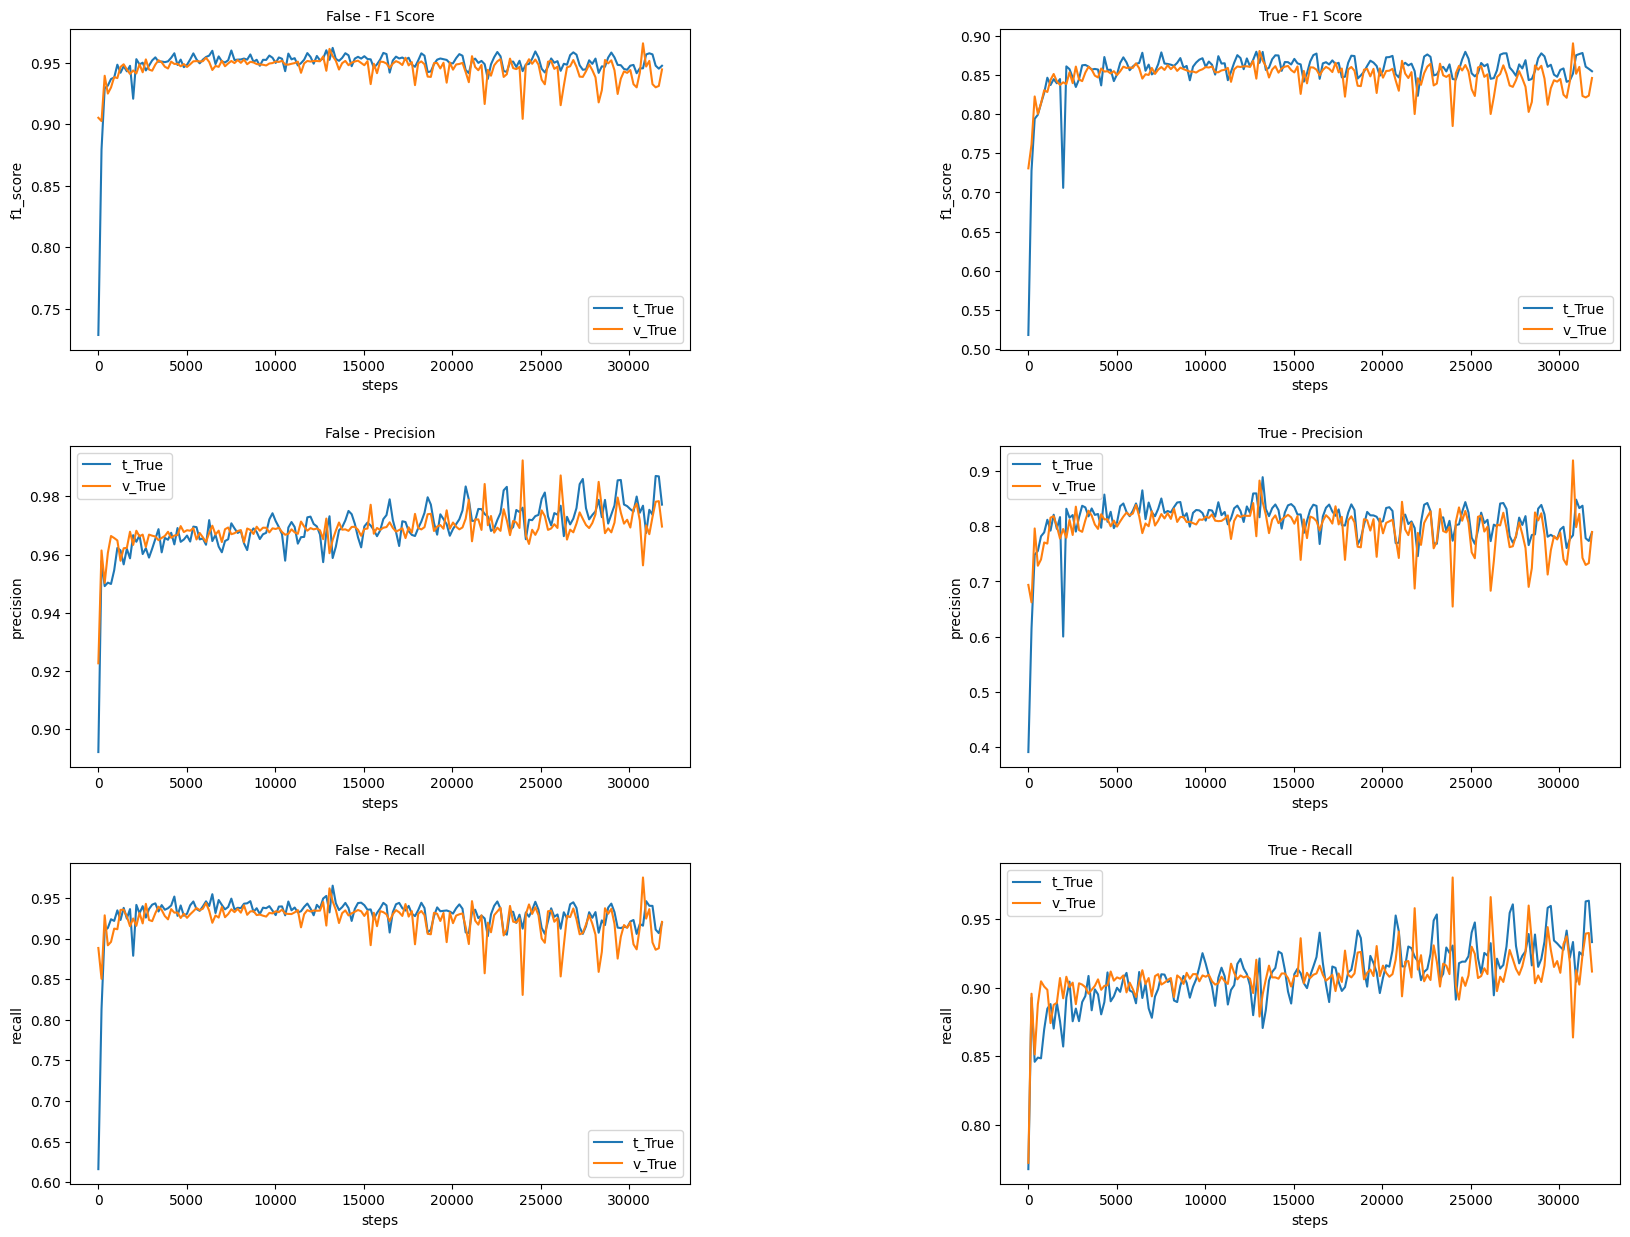

In [127]:
plt.clf()

fig, ax = plt.subplots(3,len(stats["t_f1_score"][0]), figsize=(20,15))
plot_f1_score(len(stats['t_loss']),ax,stats)

plt.subplots_adjust(hspace=0.3,wspace=0.5)
plt.show()

In [122]:
len(stats["t_f1_score"][0])

2

In [124]:
stats["t_f1_score"][11]

[['False', 0.9206349206349207], ['True', 0.7058823529411764]]

In [125]:
stats["t_loss"][11]

0.0017674189035903792